In [29]:
# Import modules 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval
import os
import re
import seaborn as sns
from functools import reduce

sns.set()

In [2]:
# List the data
for path, _, filename in os.walk("../data"):
    print(filename)

['data_w_genres.csv', 'super_genres.json', 'data_by_artist.csv', 'data_by_genres.csv', 'data_by_year.csv', 'data.csv']


In [74]:
# Load data and peek into it

data = pd.read_csv("../data/data.csv", parse_dates=['year'], index_col='year')
data['artists'] = data.artists.apply(lambda x: literal_eval(x))
data.head(3)

,Unnamed: 0,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence
year,,,,,,,,,,,,,,,,,,,
1921-01-01,0,0.732,[Dennis Day],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000,7,0.160,-12.441,1,Clancy Lowered the Boom,8,1921,0.4150,60.936,0.9630
1921-01-01,1,0.982,"[Sergei Rachmaninoff, James Levine, Berliner P...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",5,1921,0.0366,80.954,0.0594
1921-01-01,2,0.996,[John McCormack],0.518,159507,0.203,0,5uNZnElqOS3W4fRmRYPk4T,0.000,0,0.115,-10.589,1,The Wearing of the Green,6,1921,0.0615,66.221,0.4060


In [75]:
# Select import columns

columns = [ 'release_date', 'Unnamed: 0', 'id', 'key', 'mode']
data.drop(columns = columns, inplace=True)

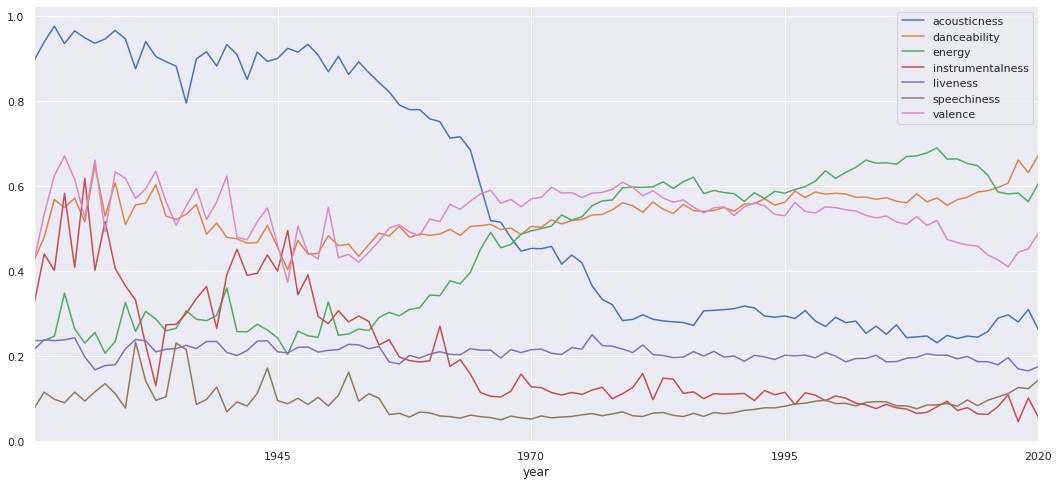

In [5]:
# How trends change over time?

cols = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']
data[cols].resample('A').mean().plot(figsize=(18,8))
plt.show()

# Acousticness have been decreased and energy have been increased over time.

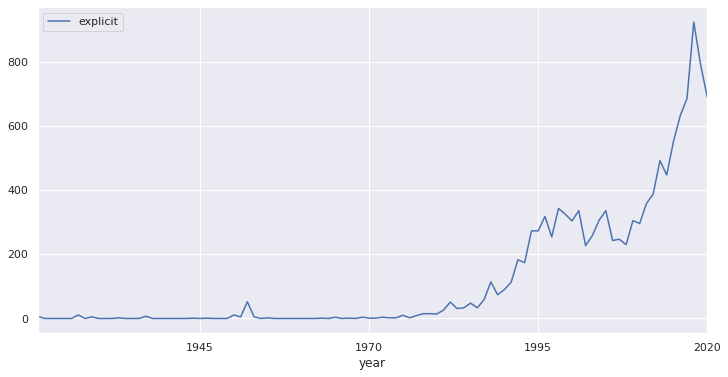

In [6]:
# Number of explicit music per year

cols = ['explicit']
data[cols].resample('A').sum().plot(figsize=(12,6))
plt.show()

# Explicit music have been increased.

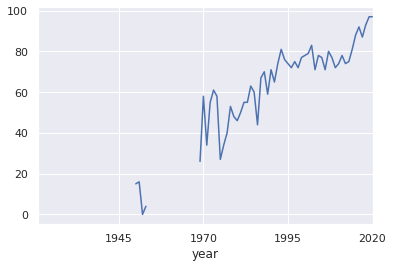

In [15]:
# Popularity of explicit music over time

explicit_music = data[data.explicit == 1]
explicit_music.resample('A').first().popularity.plot()

In [79]:
# Top 5 popular songs of Eminem

def check_artist(x, artist='Eminem'):
    for i in x:
        if i == artist:
            return True
    return False

    
data[data.artists.apply(check_artist)].nlargest(5, 'popularity')


,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,name,popularity,speechiness,tempo,valence
year,,,,,,,,,,,,,,
2020-01-01,0.14500,"[Eminem, Juice WRLD]",0.808,210800,0.745,1,0.0,0.2920,-5.260,Godzilla (feat. Juice WRLD),91,0.3420,165.995,0.829
2002-01-01,0.06220,"[Eminem, Nate Dogg]",0.548,297787,0.847,1,0.0,0.0816,-3.237,'Till I Collapse,83,0.1860,171.447,0.100
2002-01-01,0.00286,[Eminem],0.908,290320,0.669,1,0.0,0.2370,-2.827,Without Me,82,0.0738,112.238,0.662
2010-01-01,0.24100,"[Eminem, Rihanna]",0.749,263373,0.925,1,0.0,0.5200,-5.034,Love The Way You Lie,81,0.2270,86.989,0.641
2000-01-01,0.03020,[Eminem],0.949,284200,0.661,1,0.0,0.0454,-4.244,The Real Slim Shady,79,0.0572,104.504,0.760


In [7]:
# # Check if a numerical or special character is present in artist name.

# mask = data_by_artist.artists.str.match(r'([^A-za_z])')
# data_by_artist[mask].head()
# # Replace with Fake Name

# data_by_artist.loc[mask, 'artists'] = 'Unkown'

In [48]:
# Load data and peek into it

data_w_genres = pd.read_csv("../data/data_w_genres.csv")
columns = ['Unnamed: 0', 'key', 'mode']
data_w_genres.drop(columns = columns, inplace=True)
data_w_genres.head(3)

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,count,genres
0,Francisco Canaro,0.983072,0.654711,177776.513454,0.292622,0.490675,0.201118,-11.733373,0.111007,123.608786,0.746469,0.054257,2267,"['tango', 'vintage tango']"
1,Frédéric Chopin,0.989961,0.340087,251871.948502,0.106874,0.876899,0.155677,-22.575578,0.042913,90.977772,0.203644,5.748127,1068,"['classical', 'early romantic era', 'polish cl..."
2,Ludwig van Beethoven,0.955019,0.340157,439361.331606,0.153176,0.690770,0.164078,-20.107704,0.055550,104.833536,0.260255,5.237306,965,"['classical', 'classical era', 'early romantic..."


In [49]:
# Top 5 positive music artists (No vocal)

no_vocal  = data_w_genres[data_w_genres.instrumentalness > 0.5]
no_vocal.nlargest(5, 'valence')

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,count,genres
19505,John Doherty,0.988000,0.746,137093.0,0.386,0.946,0.205,-12.720,0.0874,119.318,0.999,21.0,1,"['irish fiddle', 'jig and reel']"
19354,Tizz3lbeatz,0.382000,0.643,45740.0,0.565,0.860,0.108,-9.610,0.0483,104.999,0.992,59.0,1,[]
15739,Soulsearcher,0.000362,0.747,412973.0,0.973,0.565,0.308,-6.415,0.0370,128.127,0.983,53.0,1,"['chicago house', 'deep house', 'disco house',..."
15464,Los Rurales De Gilberto Parra,0.499000,0.707,173933.0,0.779,0.897,0.314,-6.367,0.0479,127.707,0.979,22.0,1,[]
15725,Tony MacMahon,0.931000,0.578,198067.0,0.529,0.943,0.927,-10.605,0.0592,126.925,0.978,28.0,1,"['irish accordion', 'irish folk']"


In [50]:
# Most popular rapper

def check_for_genre(x, genre='rap'):
    for i in x:
        if genre in i:
            return True
    return False

data_w_genres['genres'] = data_w_genres.genres.apply(lambda x: literal_eval(x))
mask = data_w_genres['genres'].apply(check_for_genre)
rappers = data_w_genres[mask]
top_5 = rappers.nlargest(5, 'popularity')
top_5

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,count,genres
11028,Dímelo Flow,0.272667,0.787000,224591.333333,0.65700,0.000215,0.068200,-3.909333,0.168300,147.264667,0.565667,87.666667,3,"[latin, reggaeton, reggaeton flow, trap latino]"
18963,Giveon,0.629000,0.735000,220488.000000,0.44900,0.000000,0.113000,-7.507000,0.347000,122.947000,0.039700,86.000000,1,"[alternative r&b, indie r&b, trap soul]"
7666,JACKBOYS,0.071475,0.724500,208440.000000,0.61525,0.000004,0.206750,-5.131000,0.225300,131.098750,0.386000,80.250000,4,"[rap, trap]"
3126,Lenny Tavárez,0.245531,0.709846,264826.538462,0.69800,0.000017,0.160315,-4.262154,0.185354,168.879923,0.706846,80.230769,13,"[latin, trap argentino]"
17988,Tion Wayne,0.000415,0.572000,169355.000000,0.51900,0.000023,0.129000,-8.054000,0.243000,100.453000,0.704000,80.000000,1,"[london rap, uk hip hop]"


In [71]:
# Load data and peek into it

data_by_genres = pd.read_csv("../data/data_by_genres.csv")
columns = ['key', 'mode']
data_by_genres.drop(columns = columns, inplace=True)
data_by_genres.head(3)

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,21st century classical,0.983000,0.21850,1.496130e+05,0.018350,0.874000,0.112800,-37.256000,0.038750,69.526500,0.062900,40.500000
1,432hz,0.485070,0.33000,1.059273e+06,0.463084,0.480393,0.118862,-17.099000,0.086288,125.227125,0.217675,52.125000
2,[],0.686395,0.51683,2.305397e+05,0.397491,0.202883,0.221324,-12.773475,0.109871,111.933224,0.513905,21.556669


In [72]:
# Most Popular Genres 

data_by_genres.nlargest(5, 'popularity')

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
2100,russian dance,0.005610,0.653000,198095.000000,0.945000,0.915000,0.439000,-2.6340,0.095900,126.091000,0.326000,85.000000
511,circuit,0.009030,0.745000,189818.000000,0.972000,0.465000,0.297000,-3.5060,0.077400,128.031000,0.556000,82.000000
1095,guaracha,0.009030,0.745000,189818.000000,0.972000,0.465000,0.297000,-3.5060,0.077400,128.031000,0.556000,82.000000
2017,r&b en espanol,0.274831,0.745015,218545.238462,0.641785,0.002416,0.117165,-4.8676,0.157413,134.531315,0.537846,78.446154
793,dong-yo,0.259000,0.829000,80927.000000,0.886000,0.000000,0.055900,-1.7460,0.112000,115.056000,0.777000,78.000000


In [114]:
# Import modules 

import pandas as pd
from ast import literal_eval
import os
import re
from functools import reduce
import json

# Load data
data = pd.read_csv("../data/data.csv", parse_dates=['year'], index_col='year')
data['artists'] = data.artists.apply(lambda x: literal_eval(x))
data.reset_index(inplace=True)


In [106]:
a = data[data.index.year == 2000].nlargest(5, 'popularity').reset_index(drop=True).to_json(orient='records')

In [120]:

def check_artist(x, artist):
    for i in x:
        if i == artist:
            return True
    return False

    
data[data.artists.apply(check_artist, artist='Eminem')].nlargest(5, 'popularity').reset_index(drop=True).to_json(orient='records')


'[{"year":1577836800000,"Unnamed: 0":9887,"acousticness":0.145,"artists":["Eminem","Juice WRLD"],"danceability":0.808,"duration_ms":210800,"energy":0.745,"explicit":1,"id":"7FIWs0pqAYbP91WWM0vlTQ","instrumentalness":0.0,"key":10,"liveness":0.292,"loudness":-5.26,"mode":0,"name":"Godzilla (feat. Juice WRLD)","popularity":91,"release_date":"2020-01-17","speechiness":0.342,"tempo":165.995,"valence":0.829},{"year":1009843200000,"Unnamed: 0":8072,"acousticness":0.0622,"artists":["Eminem","Nate Dogg"],"danceability":0.548,"duration_ms":297787,"energy":0.847,"explicit":1,"id":"4xkOaSrkexMciUUogZKVTS","instrumentalness":0.0,"key":1,"liveness":0.0816,"loudness":-3.237,"mode":1,"name":"\'Till I Collapse","popularity":83,"release_date":"2002-05-26","speechiness":0.186,"tempo":171.447,"valence":0.1},{"year":1009843200000,"Unnamed: 0":8073,"acousticness":0.00286,"artists":["Eminem"],"danceability":0.908,"duration_ms":290320,"energy":0.669,"explicit":1,"id":"7lQ8MOhq6IN2w8EYcFNSUk","instrumentalness